# Author: Pradeep Sathyamurthy
# Project: Case-2
# Topic Covered: Linear Modelling Using sklearn
# Start Date: 25 Oct 2017
# Last Modified: 24 Nov 2017
# Dataset: Movie Lens 100K <a href='https://grouplens.org/datasets/movielens/100k/'>Link</a>

In [120]:
# Importing the necessary pacakges
import pandas as pd # Used for data processing, manipulation and cleaning
import numpy as np # Used for mathematical calc
import matplotlib  # including the matplotlib to my project namespace
from matplotlib import pyplot as plt # used for visialization
% matplotlib inline
import pylab as pl
import sklearn # including the sklearn to my project namespace
from sklearn.cross_validation import train_test_split # for data partition
from sklearn.cross_validation import KFold # for k-fold cross validation
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor # for regression modelling

In [10]:
pwd

'D:\\Courses\\CSC529 - Python\\project'

## Step-1: Reading Data

In [39]:
# Importing the user file
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
data_users = pd.read_csv('u.user', sep='|', names=user_cols, encoding='utf-8')
print(data_users.shape)
data_users.head(3)

(943, 5)


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


In [40]:
# Importing the items file, item here is movies
movies_cols = ['movie_id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
# since 'utf8' codec can't decode byte 0xe9 in position 3. we will change the encoding as latin-1
data_movies = pd.read_csv('u.item', sep='|', names=movies_cols, encoding='latin-1')
print (data_movies.shape)
data_movies.head(3)

(1682, 24)


,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# Importing the ratings file:
# since the item here is movie, i will try to rename the columns whereever item is there as movie
# This is a conglomoration of User data and item data in order to provide rating for movies watched by user
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
data_rating = pd.read_csv('u.data', sep='\t', names=rating_cols, encoding='utf-8')
print (data_rating.shape)
data_rating.head(3)

(100000, 4)


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


## Step-2: Data Merging

In [42]:
# Merging Rating data with user data
data_raw = pd.merge(data_rating,data_users,how='left',left_on='user_id',right_on='user_id')

In [43]:
data_raw.shape

(100000, 8)

In [44]:
data_raw.head(3)

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code
0,196,242,3,881250949,49,M,writer,55105
1,186,302,3,891717742,39,F,executive,00000
2,22,377,1,878887116,25,M,writer,40206


In [45]:
# Merging Rating & User data with Item data
data_raw = pd.merge(data_raw,data_movies,how='left',left_on='movie_id',right_on='movie_id')

In [46]:
data_raw.shape

(100000, 31)

In [47]:
data_raw.head(3)

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,movie title,release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,39,F,executive,00000,L.A. Confidential (1997),01-Jan-1997,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,25,M,writer,40206,Heavyweights (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0


In [48]:
data_raw.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'age', 'gender',
       'occupation', 'zip_code', 'movie title', 'release date',
       'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

## Step-3: Feature Selection

In [49]:
# I am selecting only the needed columns for my data exploration
needed_col = [ 'rating', 'age', 'gender',
               'occupation','unknown', 'Action', 'Adventure',
               'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
               'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
               'Sci-Fi', 'Thriller', 'War', 'Western']

In [50]:
data_selected = data_raw[needed_col].copy()

In [51]:
print(data_selected.shape)
data_selected.head(5)

(100000, 23)


,rating,age,gender,occupation,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3,49,M,writer,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3,39,F,executive,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,1,25,M,writer,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2,28,M,technician,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,1,47,M,educator,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step-4: Exploratory Data Analysis

In [52]:
# Exploratory analysis on numerical feature
data_selected.describe()

,rating,age,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,100000.000000,100000.000000,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,3.529860,32.969850,0.0001,0.255890,0.137530,0.036050,0.071820,0.298320,0.080550,0.007580,...,0.013520,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540
std,1.125674,11.562623,0.0100,0.436362,0.344408,0.186416,0.258191,0.457523,0.272144,0.086733,...,0.115487,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894
min,1.000000,7.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,3.000000,24.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,4.000000,30.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
75%,4.000000,40.000000,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
max,5.000000,73.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [79]:
data_selected.corr() > 0.7

,rating,age,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
rating,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
age,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
unknown,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Action,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Adventure,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Animation,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Childrens,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Comedy,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Crime,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Documentary,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [80]:
data_selected.corr() < -0.7

,rating,age,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
rating,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
age,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
unknown,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Action,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Adventure,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Animation,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Childrens,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Comedy,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Crime,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Documentary,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Some Important Inference:
#### 1. Average rating of the movies in this dataset is 3.5 
#### 2. Users of age 32 to 33 years have provided maximum rating
#### 3. I see no correlation with the variables and hence i assume there shouldnt be any multicollinearity issues
#### 3. For now we will have only these two hypothesis into consideration and move forward

In [57]:
# Exploratory analysis on categorical feature
data_cat = data_selected[['gender','occupation']]

In [58]:
# distribution of male and female in dataset
data_cat.groupby('gender', sort=True).count()

,occupation
gender,
F,25740
M,74260


In [62]:
pd.crosstab(data_cat.occupation,data_cat.gender)

gender,F,M
occupation,,
administrator,2654,4825
artist,971,1337
doctor,0,540
educator,2537,6905
engineer,145,8030
entertainment,225,1870
executive,221,3182
healthcare,2307,497
homemaker,269,30


### Some Important Inference:
#### 1. Male users are more in the dataset when compare to female users
#### 2. Major users who provide ratings are Students followed by educators, engineers, administrators and others
#### 3. For now we will have only these two hypothesis into consideration and move forward

In [64]:
# Let us now visualize this dataset wrt to target variable rating
data_selected.columns

Index(['rating', 'age', 'gender', 'occupation', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

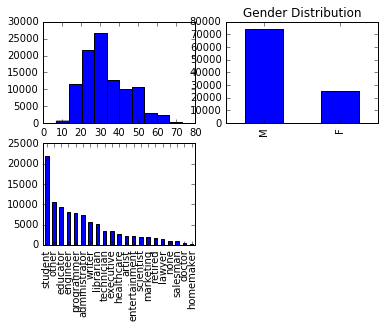

In [70]:
plt.subplot(221)
plt.hist(data_selected['age'])
plt.subplot(222)
#plt.bar(data_users['gender'])
data_selected['gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.subplot(223)
data_selected['occupation'].value_counts().plot(kind='bar')

### Hypothesis:
#### 1. Dataset is dominated by male users of age ranging between 20-40 who are mostly students.
#### 2. I would like to move forward only with this simple hypothesis now

## Step-5: Feature Engineering and Getting Dummies

In [84]:
# Performing min-max normalization for age
data_treated = data_selected.copy()
min_age = data_treated['age'].min()
max_age = data_treated['age'].max()
age_min_max_norm = (data_treated["age"] - min_age) / (max_age-min_age)
data_treated['age_min_max_norm'] = age_min_max_norm

In [85]:
data_treated = pd.get_dummies(data_treated)

In [86]:
data_treated.shape

(100000, 45)

In [87]:
data_treated.head(3)

,rating,age,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,3,49,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,39,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,25,0,0,0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
data_treated = data_treated.drop('age',axis=1)

In [91]:
data_treated.shape

(100000, 44)

In [92]:
data_treated.head(3)

,rating,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,3,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Step-6: Data Partition (Train, Validation and Test)

In [129]:
# Doing 70-30 split to get train and test data
data_train, data_test = train_test_split(data_treated,train_size=0.7,test_size=0.3,random_state=1)

In [130]:
data_train.shape

(70000, 44)

In [131]:
data_test.shape

(30000, 44)

In [132]:
# Getting the independent and dependent variables
data_train_y = data_train['rating'].copy()

In [133]:
data_train_y.shape

(70000,)

In [134]:
data_train_x = data_train.drop('rating',axis=1)

In [135]:
data_train_x.shape

(70000, 43)

## Step-7: Model Building (Linear Regression Model)

In [136]:
lnrmodel = LinearRegression()

In [137]:
# Training the model
model1 = lnrmodel.fit(data_train_x, data_train_y)

In [138]:
# Model prediction using training data set
print(model1.predict(data_train_x[:10]))

[ 3.38092041  3.39239502  3.72265625  3.52957153  3.75708008  3.53448486
  3.615448    3.2354126   3.64556885  3.45965576]


In [139]:
# Actual value of data_train_x
print (data_train_y[:10].values)

[3 4 5 3 2 4 2 5 4 4]


## Step-8: Model Evaluation

In [140]:
# Compute RMSE on training data
p = model1.predict(data_train_x)
# Now we can constuct a vector of errors
err = abs(data_train_y-p)
# Let's see the error on the first 10 predictions
print (err[:10].values)

[ 0.38092041  0.60760498  1.27734375  0.52957153  1.75708008  0.46551514
  1.615448    1.7645874   0.35443115  0.54034424]


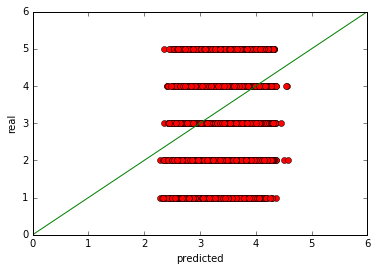

In [141]:
# Plot outputs
pl.plot(p, data_train_y,'ro')
pl.plot([0,6],[0,6], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [142]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print (rmse_train)

1.09920215482


In [143]:
# Calculating the variance in data by measuring the adjusted r^2
model1.score(data_train_x,data_train_y)

0.047207262295180234

In [159]:
# Performing 10-fold cross validation -Mean AbsoluteError
data_treated_y = data_treated['rating'].copy()
data_treated_x = data_treated.drop('rating',axis=1)

In [167]:
# Printing the result of cross validation
cv_Reg_MAE_result = sklearn.cross_validation.cross_val_score(model1,data_treated_x,y=data_treated_y,cv=10,scoring='neg_mean_absolute_error')
print(abs(cv_Reg_MAE_result))
print('Mean value of MAE for 10-fold is: ',abs(cv_Reg_MAE_result.mean()))

[ 0.92816201  0.920884    0.90266802  0.90712708  0.89368665  0.89003303
  0.89110081  0.89951249  0.89309268  0.90705044]
Mean value of MAE for 10-fold is:  0.903331719894


In [166]:
# 10 fold CV to computethe RMSE
cv_Reg_RMSE_result = sklearn.cross_validation.cross_val_score(model1,data_treated_x,y=data_treated_y,cv=10,scoring='neg_mean_squared_error')
print(abs(cv_Reg_RMSE_result))
print('Mean value of RMSE for 10-fold is: ',abs(cv_Reg_RMSE_result.mean()))

[ 1.26792297  1.25273721  1.19695999  1.21721217  1.1846542   1.18083405
  1.18074644  1.19795937  1.18525864  1.2098265 ]
Mean value of RMSE for 10-fold is:  1.20741115404


## Step-9: Model Prediction

In [146]:
data_test['rating'].head(3)

43660    5
87278    5
14317    5
Name: rating, dtype: int64

In [148]:
data_test_y = data_test['rating']
data_test_x = data_test.drop('rating',axis=1)

In [149]:
predicted_test = model1.predict(data_test_x)

In [153]:
data_compare = pd.DataFrame(columns=['Original_rating','predicted_rating'])
data_compare['Original_rating'] = data_test_y
data_compare['predicted_rating'] = predicted_test

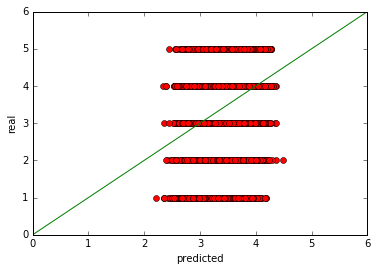

In [155]:
# Plot outputs
pl.plot(predicted_test, data_test_y,'ro')
pl.plot([0,6],[0,6], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [154]:
data_compare.head(10)

,Original_rating,predicted_rating
43660,5,3.276001
87278,5,3.649170
14317,5,3.502991
81932,4,3.503113
95321,4,3.394592
5405,2,3.472778
33188,2,3.199829
63421,1,3.649323
72897,4,3.168976
9507,5,3.769958


## Step-10: Conclusion

#### 1. Simple linear regression modeling to predict the user rating fails miserably
#### 2. Ratings which are close to 3 and 4 might have close prediction for few data. However, they are not helpful for most of the users
#### 3. We can just take this linear regression model as a bench mark model and try building a classification problem on the same data to see how it imporves the accuracy.


## <font color='red'>      End of the Book!!!   </font>